In [9]:
import pandas as pd

In [35]:
cols = ['Eviction ID', 'Address', 'City', 'State',
       'Eviction Notice Source Zipcode', 'File Date', 'Non Payment', 'Breach',
       'Nuisance', 'Illegal Use', 'Failure to Sign Renewal', 'Access Denial',
       'Unapproved Subtenant', 'Owner Move In', 'Demolition',
       'Capital Improvement', 'Substantial Rehab', 'Ellis Act WithDrawal',
       'Condo Conversion', 'Roommate Same Unit', 'Other Cause',
       'Late Payments', 'Lead Remediation', 'Development',
       'Good Samaritan Ends', 'Constraints Date', 'Supervisor District',
       'Neighborhoods - Analysis Boundaries', 'Location', 'Shape',
       'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods',
       'DELETE - Neighborhoods', 'DELETE - Police Districts',
       'DELETE - Supervisor Districts', 'DELETE - Fire Prevention Districts',
       'DELETE - Zip Codes', 'CBD, BID and GBD Boundaries as of 2017',
       'Central Market/Tenderloin Boundary', 'Areas of Vulnerability, 2016',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'Fix It Zones as of 2018-02-07', 'Neighborhoods']
types = [str] * len(cols)

evictions = pd.read_csv('eviction_notices.csv', dtype=dict(zip(cols, types)))
evictions['File Date'] = pd.to_datetime(evictions['File Date'])

evictions = evictions[['Eviction ID', 'Address',
       'Eviction Notice Source Zipcode', 'File Date', 'Non Payment', 'Breach',
       'Nuisance', 'Illegal Use', 'Failure to Sign Renewal', 'Access Denial',
       'Unapproved Subtenant', 'Owner Move In', 'Demolition',
       'Capital Improvement', 'Substantial Rehab', 'Ellis Act WithDrawal',
       'Condo Conversion', 'Roommate Same Unit', 'Other Cause',
       'Late Payments', 'Lead Remediation', 'Development',
       'Good Samaritan Ends', 'Supervisor District',
       'Neighborhoods - Analysis Boundaries', 'Shape']
]
evictions.columns = ['ID', 'Address',
       'Zipcode', 'File Date', 'Non Payment', 'Breach',
       'Nuisance', 'Illegal Use', 'Failure to Sign Renewal', 'Access Denial',
       'Unapproved Subtenant', 'Owner Move In', 'Demolition',
       'Capital Improvement', 'Substantial Rehab', 'Ellis Act WithDrawal',
       'Condo Conversion', 'Roommate Same Unit', 'Other Cause',
       'Late Payments', 'Lead Remediation', 'Development',
       'Good Samaritan Ends', 'Supervisor District',
       'Neighborhood', 'Shape']
evictions.replace('false', 0, inplace=True)
evictions.replace('true', 1, inplace=True)


evictions.head()

ID                        Address Zipcode  File Date  Non Payment  \
0  M021518    2200 Block Of Baker  Street   94123 2002-10-09            0   
1  M201619  300 Block Of Brighton  Avenue   94112 2020-11-12            0   
2  M070020  200 Block Of Guerrero  Street   94110 2007-02-08            0   
3  M200675    100 Block Of Waller  Street   94102 2020-05-05            0   
4  M200463  200 Block Of Kingking  Street   94107 2020-03-06            0   

   Breach  Nuisance  Illegal Use  Failure to Sign Renewal  Access Denial  ...  \
0       0         0            0                        0              0  ...   
1       1         0            0                        0              0  ...   
2       0         0            0                        0              0  ...   
3       1         0            0                        0              0  ...   
4       1         0            0                        0              0  ...   

   Condo Conversion  Roommate Same Unit  Other Cause  Late Payments  \
0                 0                   0            0              0   
1                 0                   0            0              0   
2                 0                   0            0              0   
3                 0                   0            0              0   
4                 0                   0            0              0   

   Lead Remediation  Development  Good Samaritan Ends  Supervisor District  \
0                 0            0                    0                    2   
1                 0            0                    0                  NaN   
2                 0            0                    0                    8   
3                 0            0                    0                  NaN   
4                 0            0                    0                  NaN   

      Neighborhood                         Shape  
0  Pacific Heights  POINT (-122.44458 37.791653)  
1              NaN                           NaN  
2          Mission   POINT (-122.42439 37.76721)  
3              NaN                           NaN  
4              NaN                           NaN  

[5 rows x 26 columns]

In [36]:
sum(evictions.Neighborhood.isna())

73

@Noah There are 73 evictions with no neighborhood. We could fill these in based on the addresses?

In [37]:
len(evictions)

42242

In [38]:
sum(evictions.Shape.isna())

60

In [39]:
sum(evictions[evictions.Neighborhood.isna()].Shape.isna())

60

This means there are 13 Valid shapes for a NaN neighborhood that we could fill in, and that the shape is valid for all evictions with a neighborhood listed

In [40]:
sum(evictions['Supervisor District'].isna())

73

In [42]:
sum(evictions[evictions['Supervisor District'].isna()].Neighborhood.isna())

73

Means Supervisor district and Neighborhood are Null in the exact same places

In [45]:
sum(evictions.Address.isna())

0

In [46]:
sum(evictions.Zipcode.isna())

652

In [47]:
sum(evictions['File Date'].isna())

0

In [64]:
over_time = pd.DataFrame(evictions['File Date'].value_counts()).reset_index().sort_values('index', ascending=True)
over_time.head()

index  File Date
1182 1997-01-02         10
2529 1997-01-03          7
481  1997-01-06         14
4256 1997-01-07          4
475  1997-01-08         14

In [66]:
import seaborn as sns

C:\Users\Shaya\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


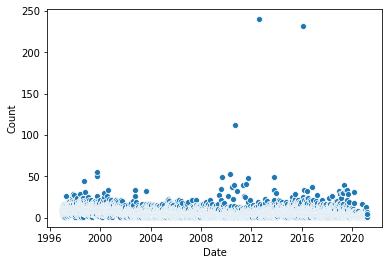

In [67]:
over_time.columns = ['Date', 'Count']
sns.scatterplot(x='Date', y='Count', data=over_time)

In [75]:
over_time[over_time.Count > 100]

Date  Count
2 2010-09-24    112
0 2012-08-16    240
1 2016-02-05    232

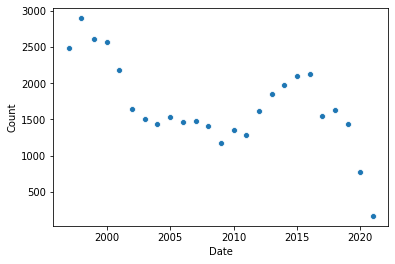

In [74]:
by_year = pd.DataFrame(evictions['File Date'].dt.year.value_counts()).reset_index().sort_values('index', ascending=True)
by_year.columns = ['Date', 'Count']
sns.scatterplot(x='Date', y='Count', data=by_year)